## Classifying images through Random Forest
- Data preprocessing process

  1. Normalize the image data by dividing it by 255

  2. Store the average value of an array of R, G, and B per image

  3. Separate train and test, train only with a train set, and test performance with a test set



## GDrive

In [ ]:
# google drive mount
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


## 1. Import library

In [ ]:
# import library
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import PIL.Image as pilimg
import os
import pandas as pd
from tensorflow import keras
from tensorflow.keras import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
from sklearn.model_selection import train_test_split

import random
import pickle
import cv2
import matplotlib

from glob import glob
from numpy import random
from PIL import Image

## 2. Copy and unzip data

In [ ]:
# copy
!cp '/gdrive/MyDrive/RGB_DATA/red_data.zip' ./
!cp '/gdrive/MyDrive/RGB_DATA/blue_data.zip' ./
!cp '/gdrive/MyDrive/RGB_DATA/green_data.zip' ./

In [ ]:
# unzip
!unzip red_data.zip
!unzip blue_data.zip
!unzip green_data.zip

## 3. Data processing
### 3.1 red data

In [ ]:
red_count = len(os.listdir('red_data'))
red_count

7018

In [ ]:
# red_data
red_tmp = glob('red_data/*.jpeg')
print(len(red_tmp))

red_list = []
for img in red_tmp:
    img = load_img(img)
    img = img_to_array(img).astype('float32')/255

    y = 64
    h = 128
    x = 64
    w = 128
    crop_img = img[y: y + h, x: x + w]

    red_avg = np.mean(crop_img[:, :, 0])
    green_avg = np.mean(crop_img[:, :, 1])
    blue_avg = np.mean(crop_img[:, :, 2])

    red_list.append(np.array([red_avg, green_avg, blue_avg]))

red_data = np.array(red_list) # red label = 0
red_data.shape

7018


(7018, 3)

In [ ]:
red_train, red_test = train_test_split(red_data, test_size=0.1, shuffle=True, random_state=42)

### 3.2 green data

In [ ]:
green_count = len(os.listdir('green_data'))
green_count

7018

In [ ]:
# green_data
green_tmp = glob('green_data/*.jpeg')
print(len(green_tmp))

green_list = []
for img in green_tmp:
    img = load_img(img)
    img = img_to_array(img).astype('float32')/255

    y = 64
    h = 128
    x = 64
    w = 128
    crop_img = img[y: y + h, x: x + w]

    red_avg = np.mean(crop_img[:, :, 0])
    green_avg = np.mean(crop_img[:, :, 1])
    blue_avg = np.mean(crop_img[:, :, 2])

    green_list.append(np.array([red_avg, green_avg, blue_avg]))

green_data = np.array(green_list) # green label = 1, 이후에..
green_data.shape

7018


(7018, 3)

In [ ]:
green_train, green_test = train_test_split(green_data, test_size=0.1, shuffle=True, random_state=42)

### 3.3 blue data

In [ ]:
blue_count = len(os.listdir('blue_data'))
blue_count

7018

In [ ]:
# blue_data
blue_tmp = glob('blue_data/*.jpeg')
print(len(blue_tmp))

blue_list = []
for img in blue_tmp:
    img = load_img(img)
    img = img_to_array(img).astype('float32')/255

    y = 64
    h = 128
    x = 64
    w = 128
    crop_img = img[y: y + h, x: x + w]

    red_avg = np.mean(crop_img[:, :, 0])
    green_avg = np.mean(crop_img[:, :, 1])
    blue_avg = np.mean(crop_img[:, :, 2])

    blue_list.append(np.array([red_avg, green_avg, blue_avg]))

blue_data = np.array(blue_list) # blue label = 2, 이후에..
blue_data.shape

7018


(7018, 3)

In [ ]:
blue_train, blue_test = train_test_split(blue_data, test_size=0.1, shuffle=True, random_state=42)

## 4. labeling

In [ ]:
len(red_train)

6316

In [ ]:
# red train, test label
red_train_label = np.zeros(len(red_train))
red_test_label = np.zeros(len(red_test))

# green train, test label
green_train_label = np.zeros(len(green_train))
for i in range(len(green_train)):
  green_train_label[i] = 1

green_test_label = np.zeros(len(green_test))
for i in range(len(green_test)):
  green_test_label[i] = 1

# blue train, test label
blue_train_label = np.zeros(len(blue_train))
for i in range(len(blue_train)):
  blue_train_label[i] = 2

blue_test_label = np.zeros(len(blue_test))
for i in range(len(blue_test)):
  blue_test_label[i] = 2

print(red_train_label.shape)
print(green_train_label.shape)
print(blue_train_label.shape)

print(red_test_label.shape)
print(green_test_label.shape)
print(blue_test_label.shape)

(6316,)
(6316,)
(6316,)
(702,)
(702,)
(702,)


In [ ]:
print(green_train_label) # check

[1. 1. 1. ... 1. 1. 1.]


In [ ]:
# Concatenate data
X = np.concatenate([red_train, green_train, blue_train])
y = np.concatenate([red_train_label, green_train_label, blue_train_label])

X_test = np.concatenate([red_test, green_test, blue_test])
y_test = np.concatenate([red_test_label, green_test_label, blue_test_label])

print(X.shape)
print(y.shape)
print(X_test.shape)
print(y_test.shape)

(18948, 3)
(18948,)
(2106, 3)
(2106,)


## 5. Modeling

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
param_grid = [
    {'n_estimators': [100, 200, 500], 'bootstrap':[True, False], 
     'max_features':[2, 3], 'max_leaf_nodes':[8, 16], 'n_jobs':[-1]}
]

randomforest_model = RandomForestClassifier()
grid_search = GridSearchCV(randomforest_model, param_grid, cv=5,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)

grid_search.fit(X, y)
print(grid_search.best_params_)
print(grid_search.best_estimator_)

{'bootstrap': True, 'max_features': 2, 'max_leaf_nodes': 16, 'n_estimators': 200, 'n_jobs': -1}
RandomForestClassifier(max_features=2, max_leaf_nodes=16, n_estimators=200,
                       n_jobs=-1)


In [ ]:
# 가장 좋은 결과 나온 파라미터로 모델 만들기!
best_randomforest = RandomForestClassifier(n_estimators=200, bootstrap=True , max_features=2, max_leaf_nodes=16, n_jobs=-1)
best_randomforest.fit(X, y)

RandomForestClassifier(max_features=2, max_leaf_nodes=16, n_estimators=200,
                       n_jobs=-1)

## 6. Result & Visualization for data analysis

In [ ]:
from sklearn.model_selection import learning_curve
train_sizes, train_scores, test_scores, fit_times, _ =\
    learning_curve(load_randomforest, X, y,
                   cv=5, train_sizes=np.linspace(0.1, 1.0, 6),
                   scoring = 'accuracy',
                   return_times=True)

In [ ]:
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)
fit_times_mean = np.mean(fit_times, axis=1)
fit_times_std = np.std(fit_times, axis=1)

Text(0.5, 1.0, 'Random Forest Model Accuracy Curve')

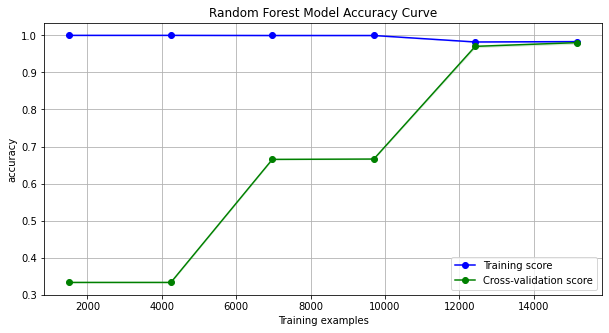

In [ ]:
_, axes = plt.subplots(1, 1, figsize=(10, 5))
axes.grid()
axes.fill_between(train_sizes, train_scores_mean - train_scores_std,
train_scores_mean + train_scores_std, alpha=0.1,
color="b")
axes.fill_between(train_sizes, test_scores_mean - test_scores_std,
test_scores_mean + test_scores_std, alpha=0.1,
color="g")
axes.plot(train_sizes, train_scores_mean, 'o-', color="b",
label="Training score")
axes.plot(train_sizes, test_scores_mean, 'o-', color="g",
label="Cross-validation score")
axes.legend(loc="best")
axes.set_xlabel("Training examples")
axes.set_ylabel("accuracy")
axes.set_title("Random Forest Model Accuracy Curve")

In [ ]:
#predict_labels = best_randomforest.predict(X_test)
predict_labels = load_randomforest.predict(X_test)
print(predict_labels)
print(predict_labels.shape)

# result
from sklearn import metrics
print('Accuracy:',metrics.accuracy_score(y_test, predict_labels))
print("")
print(metrics.confusion_matrix(y_test, predict_labels))
print("")
print('Precision:',metrics.precision_score(y_test, predict_labels, average=None))
print("")
print('Recall:',metrics.recall_score(y_test, predict_labels, average=None))
print("")
print('F1:',metrics.f1_score(y_test, predict_labels, average=None))

[0. 0. 0. ... 2. 2. 2.]
(2106,)
Accuracy: 0.9810066476733144

[[700   0   2]
 [  8 676  18]
 [  8   4 690]]

Precision: [0.97765363 0.99411765 0.97183099]

Recall: [0.997151   0.96296296 0.98290598]

F1: [0.98730606 0.97829233 0.97733711]


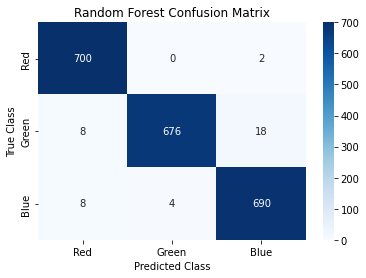

In [ ]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.metrics import plot_confusion_matrix
import seaborn as sns
from sklearn.model_selection import train_test_split
conf_matrix = metrics.confusion_matrix(y_test, predict_labels)
LABELS = ['Red', 'Green', 'Blue']

sns.heatmap(conf_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt='d', cmap=plt.cm.Blues)
plt.title('Random Forest Confusion Matrix')
plt.xlabel('Predicted Class'); plt.ylabel('True Class')
plt.show()

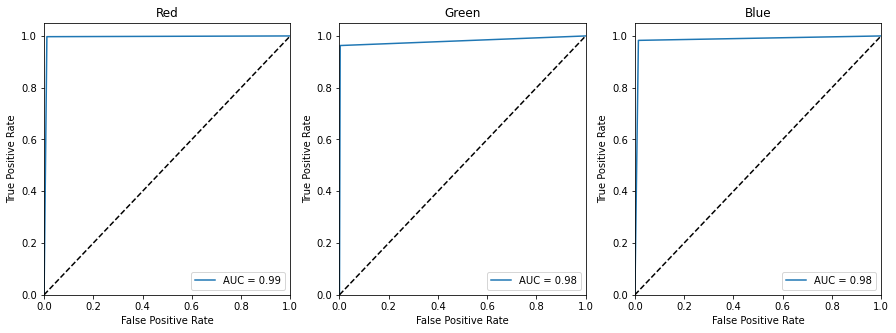

roc_auc_score:  0.9857549857549858


In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score, auc
from sklearn.preprocessing import label_binarize

labels = [0, 1, 2]
y_test = label_binarize(y_test, classes=labels)
y_pred = label_binarize(predict_labels, classes=labels)

n_classes = 3
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot of a ROC curve for a specific class
plt.figure(figsize=(15, 5))
for idx, i in enumerate(range(n_classes)):
    plt.subplot(131+idx)
    plt.plot(fpr[i], tpr[i], label='AUC = %0.2f' % roc_auc[i])
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    if idx == 0:
      plt.title('Red')
    elif idx == 1:
      plt.title('Green')
    elif idx == 2:
      plt.title('Blue')
    plt.legend(loc="lower right")
plt.show()

print("roc_auc_score: ", roc_auc_score(y_test, y_pred, multi_class='raise'))

In [ ]:
import joblib

#joblib.dump(best_randomforest, "best_randomforest(final).pkl")

# check load model
load_randomforest = joblib.load("best_randomforest(final).pkl")

## 7. Predict Orange Pi data

In [ ]:
! cp '/gdrive/MyDrive/RGB_DATA/실험.zip' ./
!unzip 실험.zip

In [ ]:
# 실험 데이터 가공하기
experiment_tmp = glob('./*.png')
print(len(experiment_tmp))

experiment_list = []
experiment_image = []
experiment_raw=[]
for img in experiment_tmp:
    img = load_img(img)
    img = img_to_array(img).astype('float32')/255

    y = 96
    h = 128
    x = 56
    w = 128
    crop_img = img[y: y + h, x: x + w]
    experiment_image.append(np.array(crop_img))

    red_avg = np.mean(crop_img[:, :, 0])
    green_avg = np.mean(crop_img[:, :, 1])
    blue_avg = np.mean(crop_img[:, :, 2])

    experiment_list.append(np.array([red_avg, green_avg, blue_avg]))

experiment_data = np.array(experiment_list) # red label = 0
experiment_image = np.array(experiment_image)

print(experiment_data.shape)
print(experiment_image.shape)

36
(36, 3)
(36, 128, 128, 3)


In [ ]:
predict_exp_labels = load_randomforest.predict(experiment_data)
print(predict_exp_labels)
predict_exp_labels.shape

[2. 2. 0. 2. 1. 0. 0. 2. 1. 0. 1. 0. 0. 0. 1. 2. 2. 2. 2. 0. 1. 0. 1. 0.
 2. 2. 1. 1. 2. 0. 1. 2. 2. 0. 1. 2.]


(36,)

In [ ]:
len(experiment_image)

36

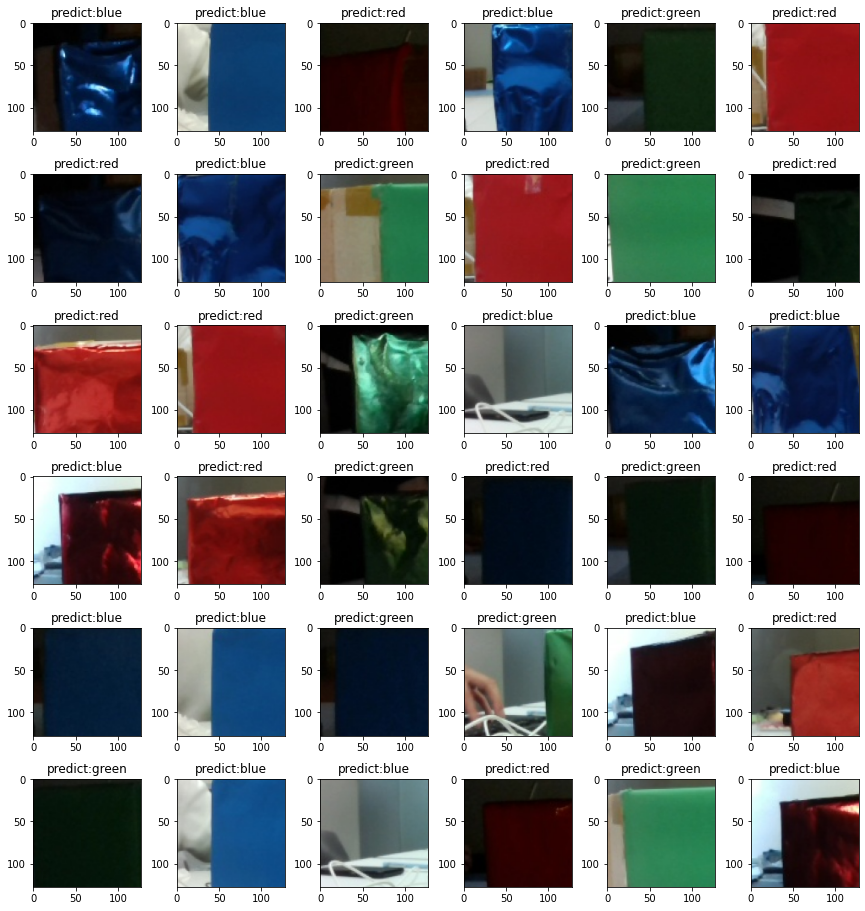

In [ ]:
plt.figure(figsize=(15,15))
for i in range(36):
  plt.subplot(6,6,i+1)
  if predict_exp_labels[i] == 0:
    predict_colors = 'red'
  elif predict_exp_labels[i] == 1:
    predict_colors = 'green'
  elif predict_exp_labels[i] == 2:
    predict_colors = 'blue'
  else :
    predict_colors = 'none'

  plt.title("predict:%s"%predict_colors)
  plt.imshow(experiment_image[i])
  plt.subplots_adjust(left=0.125, bottom=0.1,  right=0.9, top=0.9, wspace=0.2, hspace=0.4)

plt.show()